<a href="https://colab.research.google.com/github/2303A52381/Explainable--AI-Lab/blob/main/LAB_EXAM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers
[AUTISM SCREENING DATA FOR TODDLERS]

STEP 1.Import libraries and load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Load dataset (upload autism.csv in Colab)
df = pd.read_csv("autism.csv")
print("✅ Dataset loaded! Shape:", df.shape)
df.head()


✅ Dataset loaded! Shape: (6075, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jauundice,Family_ASD,Class
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES


STEP 2.Handle missing values

In [ ]:
for col in df.columns:
      if df[col].dtype == 'object':
          df[col].fillna(df[col].mode()[0], inplace=True)
      else:
          df[col].fillna(df[col].mean(), inplace=True)
print("✅ Missing values handled!")


✅ Missing values handled!


STEP 3.Encode Categorical Columns

In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
print("✅ All categorical columns encoded.")


✅ All categorical columns encoded.


STEP 4. Normalization

In [ ]:
# 🧩 STEP 4 — Normalize the features safely (Autism version)

from sklearn.preprocessing import StandardScaler

# ✅ Automatically detect the target column
target_candidates = [col for col in df.columns if 'class' in col.lower() or 'autism' in col.lower()]
if target_candidates:
    target = target_candidates[0]
else:
    # 👇 Set manually if needed
    target = 'Class/Autism'

print(f"🎯 Target column detected as: {target}")

# ✅ Split features and target
X = df.drop(columns=[target])
y = df[target]

# ✅ Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Convert back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("✅ Features normalized successfully!")
print("Scaled Data Shape:", X_scaled.shape)


🎯 Target column detected as: Class
✅ Features normalized successfully!
Scaled Data Shape: (6075, 14)


STEP 5 — Handle Class Imbalance (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

print("✅ Class imbalance handled with SMOTE!")
print("Before:", np.bincount(y))
print("After:", np.bincount(y_res))


✅ Class imbalance handled with SMOTE!
Before: [4271 1804]
After: [4271 4271]


STEP 6 — Correlation Analysis

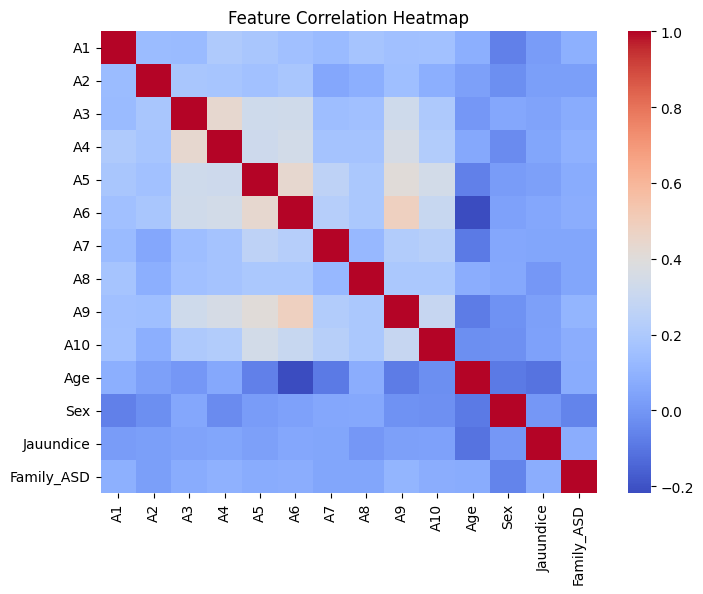

In [ ]:
corr = pd.DataFrame(X_res, columns=X.columns).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


STEP 7 — SHAP (Feature Importance)

✅ SHAP feature importance ready!


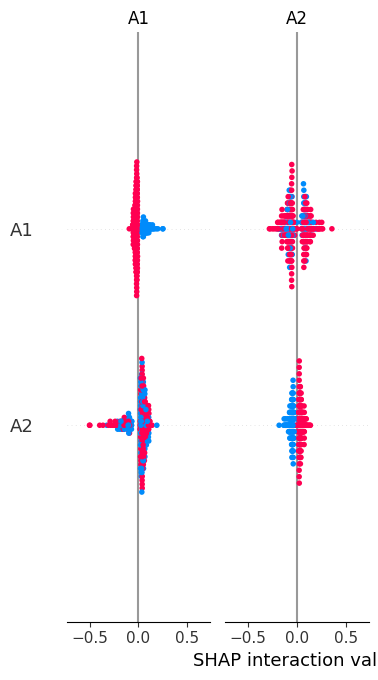

In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_res, y_res)

# Use small sample for speed
sample_X = pd.DataFrame(X_res, columns=X.columns).sample(n=300, random_state=42)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(sample_X)

print("✅ SHAP feature importance ready!")
shap.summary_plot(shap_values, sample_X, plot_type="bar")


STEP 8 — Data Visualization (Basic & Advanced)

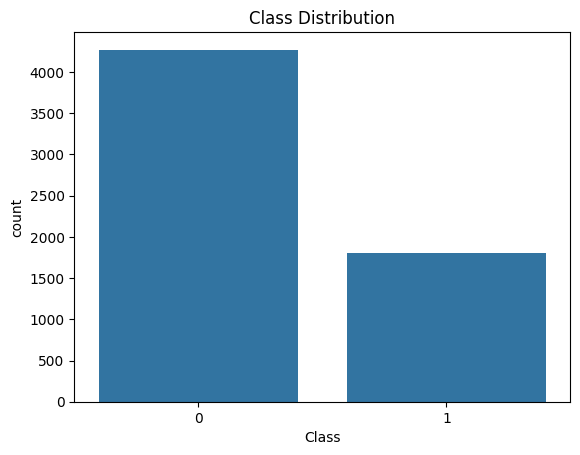

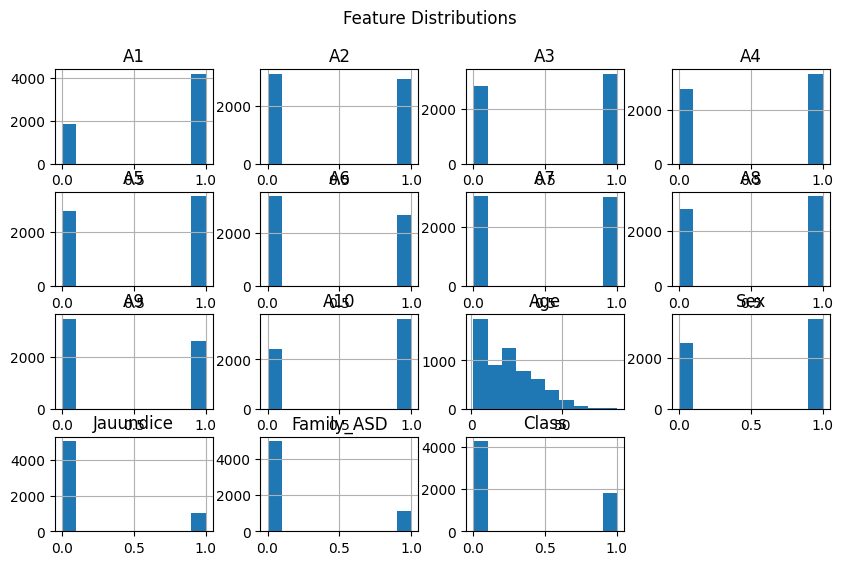

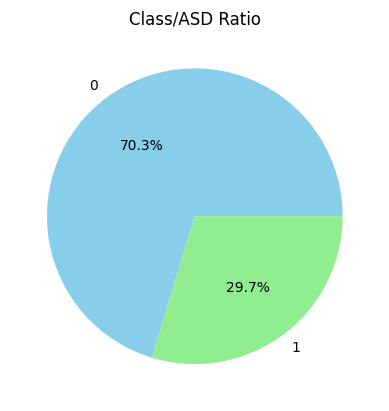

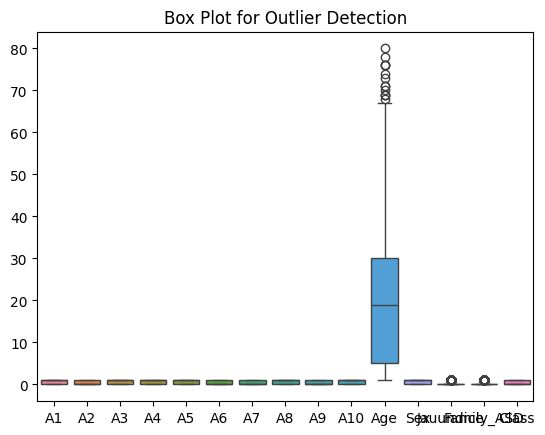

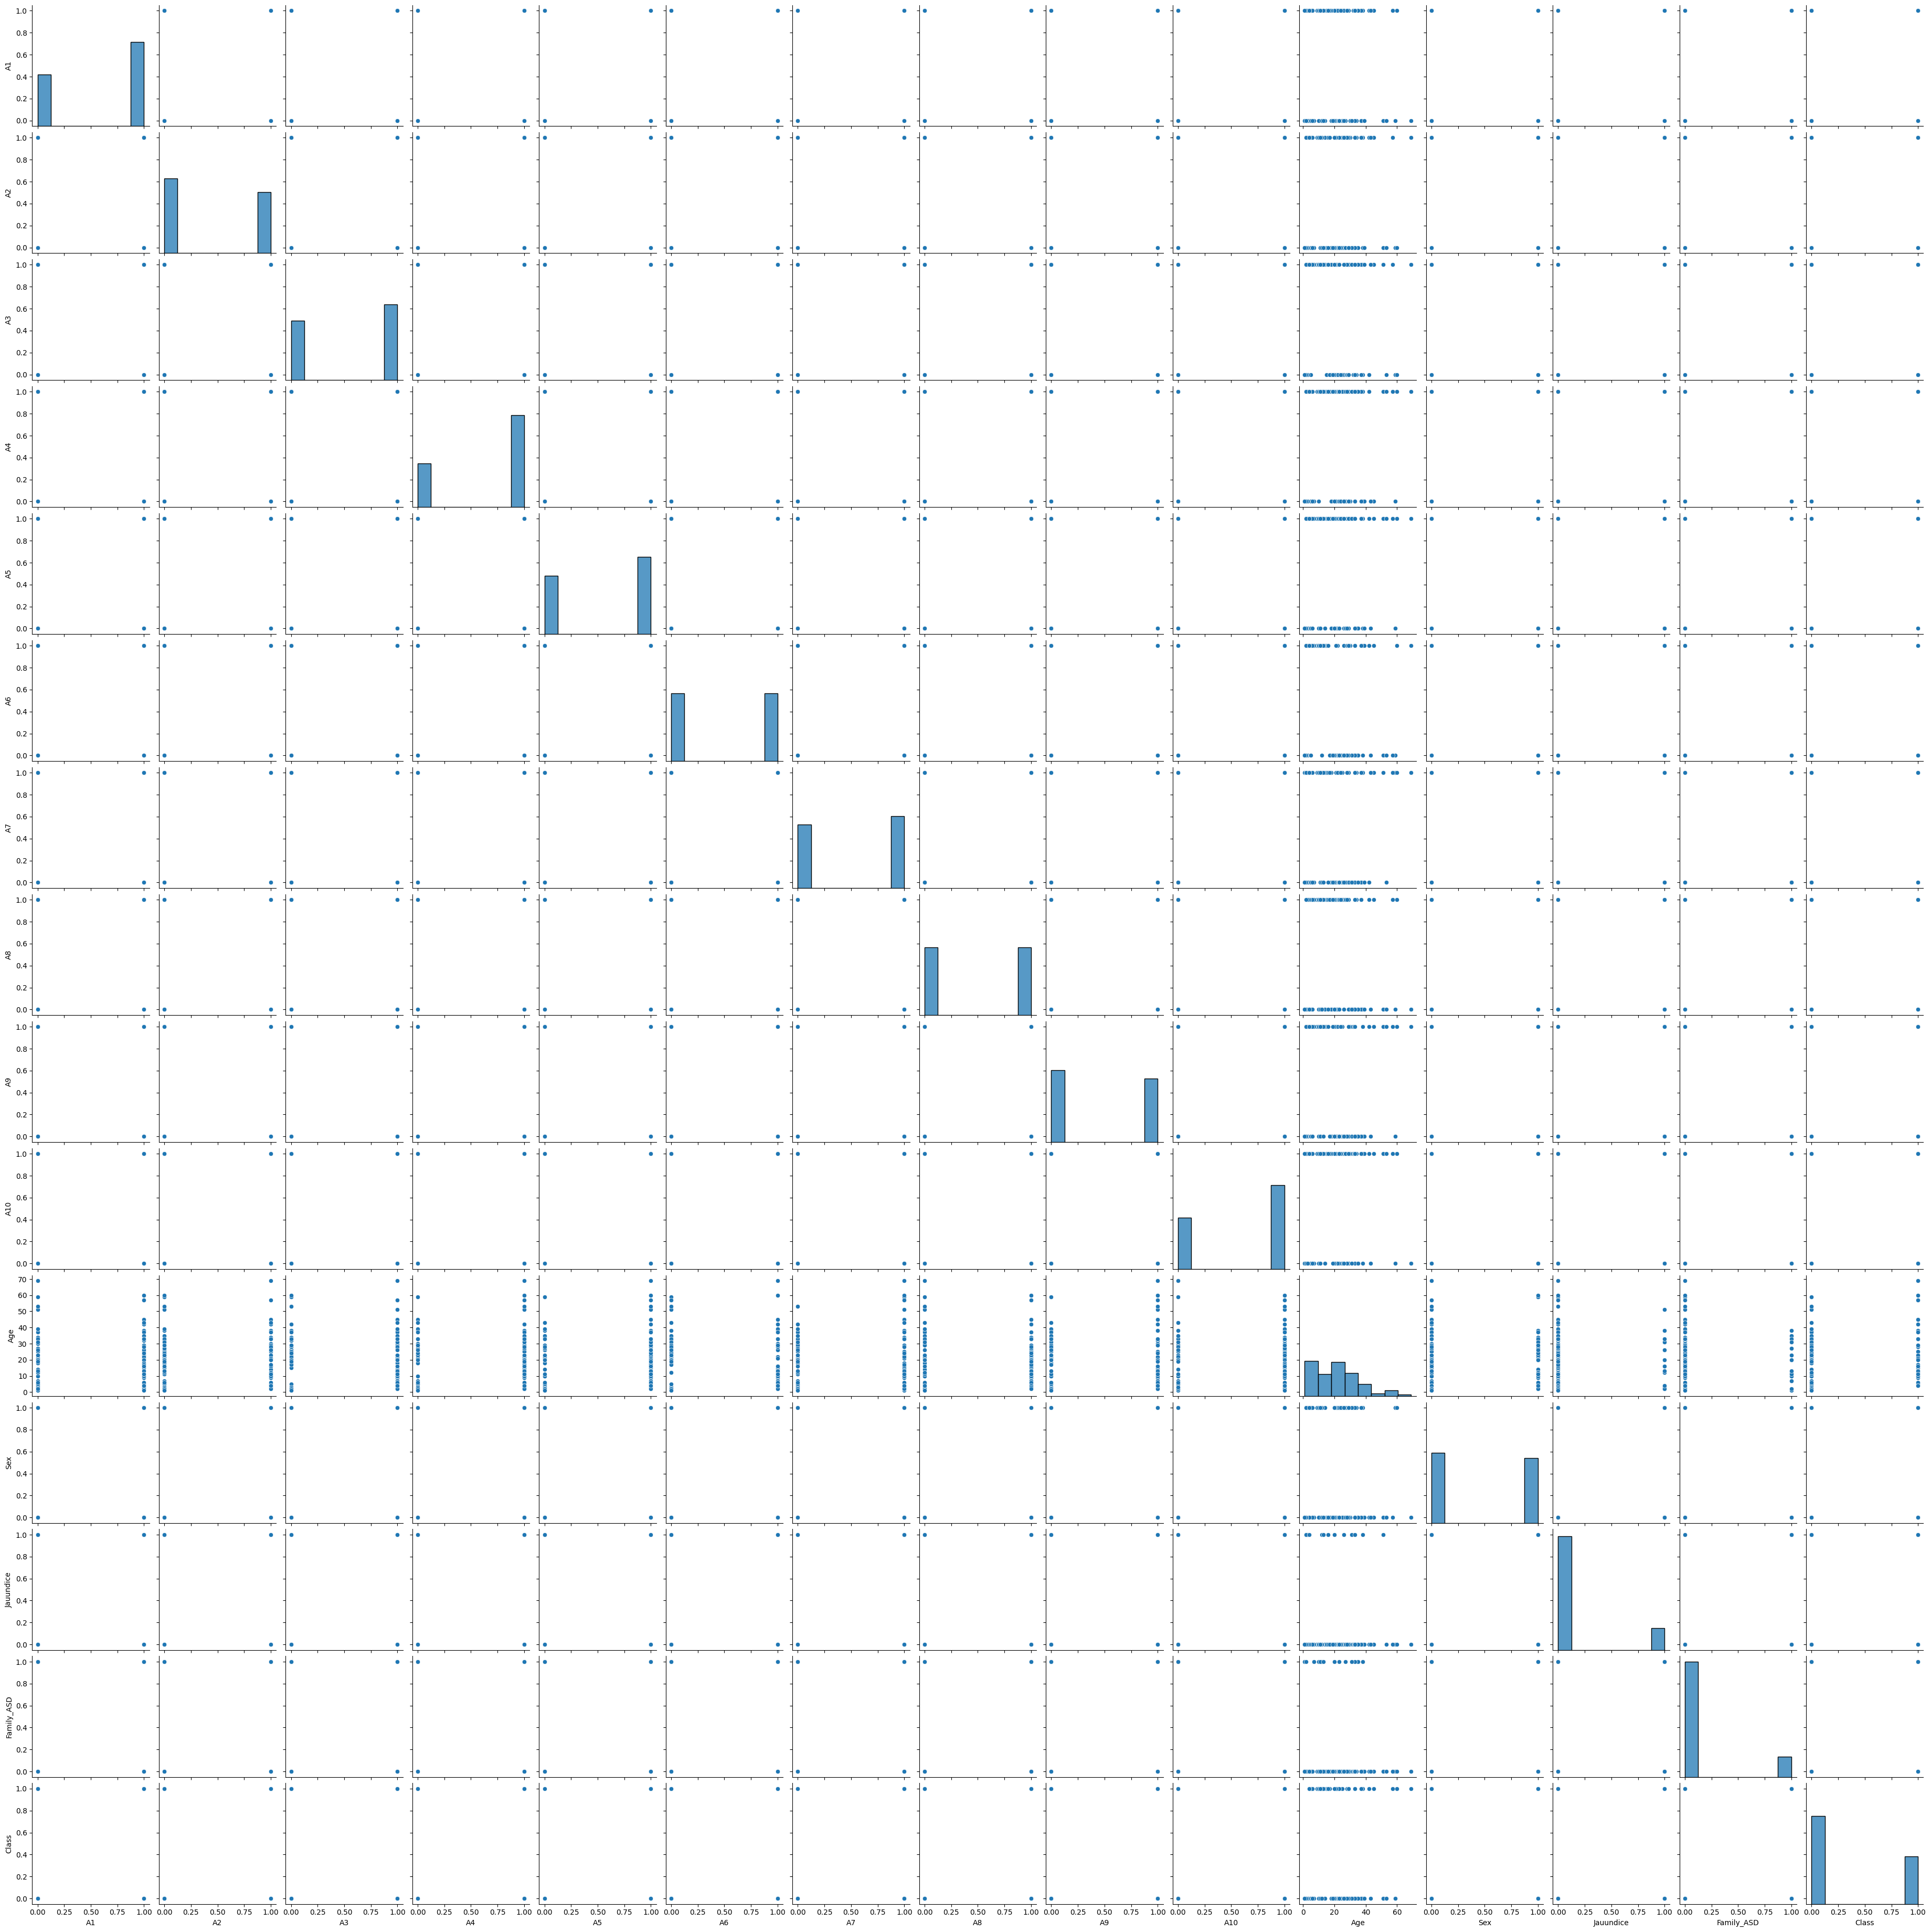

In [ ]:
# Class Distribution
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

# Histogram
df.hist(figsize=(10,6))
plt.suptitle("Feature Distributions")
plt.show()

# Pie Chart
df[target].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue','lightgreen'])
plt.title("Class/ASD Ratio")
plt.ylabel('')
plt.show()

# Box Plot
sns.boxplot(data=df)
plt.title("Box Plot for Outlier Detection")
plt.show()

# Pair Plot
sns.pairplot(df.sample(100))  # sample for speed
plt.show()


STEP 9 — Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
      X_res, y_res, test_size=0.2, random_state=42
)
print("✅ Data split done!")



✅ Data split done!


STEP 10 — Machine Learning Models
1.Logistic Regression
python

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=300)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


2.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


3.KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


4.Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


5.SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


STEP 11 — Model Evaluation

In [ ]:
# ✅ Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 🧠 Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Initialize models
lr = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
nb = GaussianNB()
svm = SVC(kernel='linear', random_state=42)

# ✅ Train models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)

# ✅ Make predictions
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_svm = svm.predict(X_test)

# ✅ Combine predictions into dictionary
models = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "KNN": y_pred_knn,
    "Naive Bayes": y_pred_nb,
    "SVM": y_pred_svm
                    }

# ✅ Evaluate model performance
print("✅ Model Performance:")
for name, pred in models.items():
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred, average='binary')
    rec = recall_score(y_test, pred, average='binary')
    f1 = f1_score(y_test, pred, average='binary')
print(f"{name}: Acc={acc:.3f} | Prec={prec:.3f} | Rec={rec:.3f} | F1={f1:.3f}")


✅ Model Performance:
SVM: Acc=0.914 | Prec=0.840 | Rec=0.886 | F1=0.862


STEP 12 — Ensemble Models
Random Forest, AdaBoost, Gradient Boosting

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

rf = RandomForestClassifier(random_state=42)
adb = AdaBoostClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

for clf, name in [(rf,"RandomForest"),(adb,"AdaBoost"),(gb,"GradientBoosting")]:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(f"{name} Accuracy:", round(accuracy_score(y_test, pred), 3))


RandomForest Accuracy: 0.988
AdaBoost Accuracy: 1.0
GradientBoosting Accuracy: 1.0


STEP 13 — Deep Learning

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("✅ Deep Learning Model (MLP) Accuracy:", round(accuracy_score(y_test, y_pred_mlp), 3))


✅ Deep Learning Model (MLP) Accuracy: 0.99


STEP 14 — AUC-ROC Curve

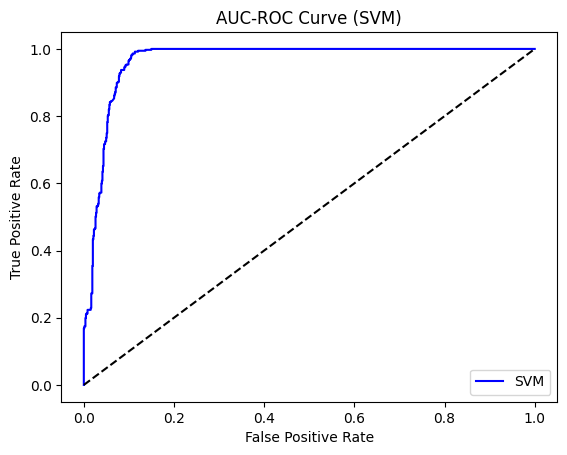

✅ AUC Score: 0.966


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Re-train SVM with probability=True
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)

# ✅ ROC Curve
fpr, tpr, _ = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='SVM', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (SVM)')
plt.legend()
plt.show()

# ✅ AUC Score
auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
print("✅ AUC Score:", round(auc, 3))


STEP 15 — Confusion Matrix (Example for SVM)

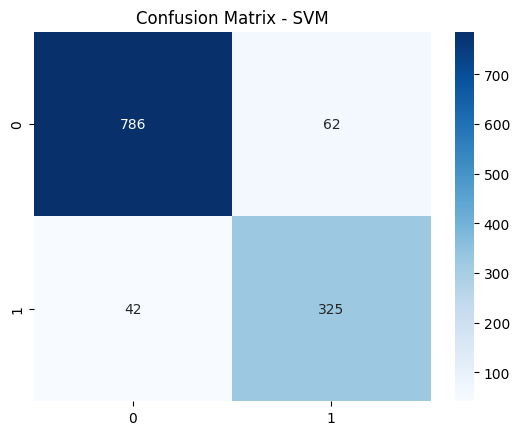

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()


Boosting algorithms

In [ ]:
!pip install xgboost lightgbm catboost


In [ ]:
import pandas as pd

# Load your dataset (update file path if needed)
df = pd.read_csv("autism.csv")

# Show first few rows
df.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jauundice,Family_ASD,Class
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES


In [ ]:
# Automatically use the last column as the target
target_col = df.columns[-1]

# Split features and target
X = df.drop(columns=[target_col])
y = df[target_col]

print("✅ Target column selected:", target_col)


✅ Target column selected: Class


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col].astype(str))

y = le.fit_transform(y.astype(str))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = {
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))



🚀 Training AdaBoost...
AdaBoost Accuracy: 1.0000
Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       854
           1       1.00      1.00      1.00       361

    accuracy                           1.00      1215
   macro avg       1.00      1.00      1.00      1215
weighted avg       1.00      1.00      1.00      1215


🚀 Training GradientBoosting...
GradientBoosting Accuracy: 1.0000
Classification Report for GradientBoosting:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       854
           1       1.00      1.00      1.00       361

    accuracy                           1.00      1215
   macro avg       1.00      1.00      1.00      1215
weighted avg       1.00      1.00      1.00      1215


🚀 Training XGBoost...
XGBoost Accuracy: 0.9984
Classification Report for XGBoost:
               precision    recall  f1-score   support

         

Voting and Stacking

[LightGBM] [Info] Number of positive: 1443, number of negative: 3417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 109
[LightGBM] [Info] Number of data points in the train set: 4860, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.296914 -> initscore=-0.862039
[LightGBM] [Info] Start training from score -0.862039
[LightGBM] [Info] Number of positive: 1443, number of negative: 3417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 109
[LightGBM] [Info] Number of data points in the train set: 4860, number of used features: 14
[LightGBM] [Info] [binary:

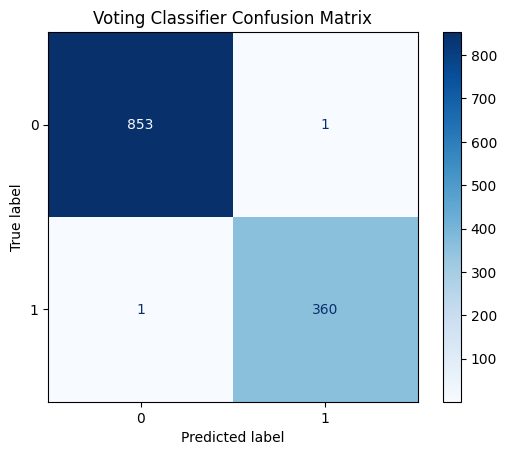


📊 Stacking Classifier Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


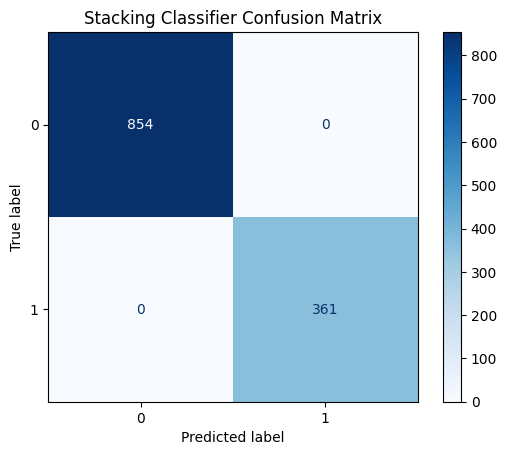

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Base learners
estimators = [
    ('xgb', models['XGBoost']),
    ('lgbm', models['LightGBM']),
    ('cat', models['CatBoost'])
]

# Voting Classifier
voting_clf = VotingClassifier(estimators=estimators, voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# Stacking Classifier
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    passthrough=True
)
stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_true, y_pred, average='weighted'))
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

evaluate_model("Voting Classifier", y_test, y_pred_voting)
evaluate_model("Stacking Classifier", y_test, y_pred_stack)


Deep Learning Algorithms

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Perceptron Accuracy: 0.8946502208709717
MLP Accuracy: 0.9769547581672668
DNN Accuracy: 0.9695473313331604


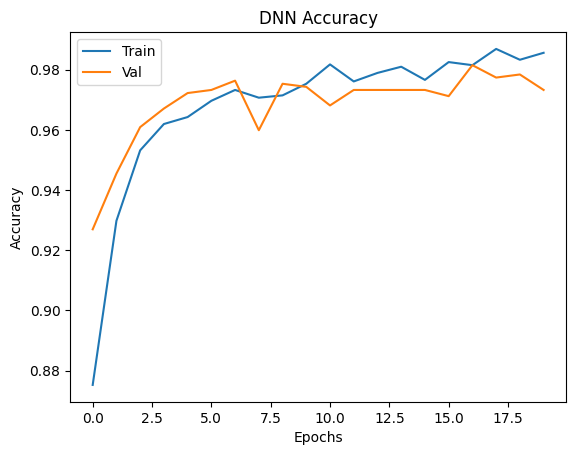

In [ ]:
!pip install tensorflow scikit-learn pandas matplotlib

# Import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load + prepare
df = pd.read_csv("autism.csv")
target_col = df.columns[-1]
X, y = df.drop(columns=[target_col]), df[target_col]
le = LabelEncoder()
for c in X.select_dtypes(include=['object']).columns: X[c] = le.fit_transform(X[c].astype(str))
y = le.fit_transform(y.astype(str))
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Perceptron
perc = Sequential([Dense(len(set(y)), activation='softmax', input_shape=(X_train.shape[1],))])
perc.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
perc.fit(X_train, y_train, epochs=10, verbose=0)
print("Perceptron Accuracy:", perc.evaluate(X_test, y_test, verbose=0)[1])

# MLP
mlp = Sequential([Dense(64, activation='relu', input_shape=(X_train.shape[1],)), Dense(32, activation='relu'), Dense(len(set(y)), activation='softmax')])
mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp.fit(X_train, y_train, epochs=15, batch_size=16, verbose=0)
print("MLP Accuracy:", mlp.evaluate(X_test, y_test, verbose=0)[1])

# DNN
dnn = Sequential([Dense(128, activation='relu', input_shape=(X_train.shape[1],)), Dropout(0.3), Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(len(set(y)), activation='softmax')])
dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = dnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
print("DNN Accuracy:", dnn.evaluate(X_test, y_test, verbose=0)[1])

# Visualization
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Val')
plt.title('DNN Accuracy'); plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.show()
